In [1]:
import os
import joblib
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [2]:
proc_path = '../data/processed'

# make scaler to go back to real scale
low_mu_data = pd.read_csv('../data/raw/low_mu_data17_trn_data.csv')
l_scaler = StandardScaler()
l_scaler.fit(low_mu_data.values)

# make scaler to go back to real scale
high_mu_data = pd.read_csv('../data/raw/high_mu_data17_trn_data.csv')
h_scaler = StandardScaler()
h_scaler.fit(high_mu_data.values)

StandardScaler()

In [3]:
m_file = joblib.load(os.path.join(proc_path, 'low_mu_lr_gen_samples.jbl'))
m_list = []
print('Total of samples: %i' %len(m_file))
for i in m_file:
    m_list.append(np.reshape(i, (104)))

# back to real scale
m_data = l_scaler.inverse_transform(np.array(m_list))
#m_data = np.array(m_list)
print(m_data.shape)
cols_ = ['avgmu'] + ['L2Calo_ring_%i' %(iring) for iring in range(100)] + ['eratio', 'rhad', 'reta']

low_gen_df = pd.DataFrame(data=m_data, columns=cols_)
low_gen_df.head()

Total of samples: 282500
(282500, 104)


,avgmu,L2Calo_ring_0,L2Calo_ring_1,L2Calo_ring_2,L2Calo_ring_3,L2Calo_ring_4,L2Calo_ring_5,L2Calo_ring_6,L2Calo_ring_7,L2Calo_ring_8,...,L2Calo_ring_93,L2Calo_ring_94,L2Calo_ring_95,L2Calo_ring_96,L2Calo_ring_97,L2Calo_ring_98,L2Calo_ring_99,eratio,rhad,reta
0,28.261322,530.508118,229.736679,11.885541,9.253069,-18.451712,5.203974,-6.942484,11.980968,1476.486450,...,31.149927,82.223602,147.228485,-1.945023,-5.270787,-12.879891,15.630764,0.915400,-0.000669,0.953327
1,28.621277,553.895386,236.954529,39.999485,29.918449,-19.966516,38.503880,-7.280590,36.096363,1558.823242,...,106.373344,55.401337,151.282364,-0.288927,6.757400,-1.774842,22.009388,0.914591,0.003641,0.955031
2,28.870825,565.452271,266.682861,46.826134,67.300850,8.565580,60.172211,-9.584667,57.249477,1604.511475,...,142.873276,94.004433,184.115601,1.939953,16.974867,3.726651,32.235321,0.918637,0.006918,0.957036
3,29.072119,590.374573,282.584290,50.056118,84.789711,26.161356,64.370056,-12.376305,83.009674,1672.912964,...,144.379700,75.946602,225.560379,3.958279,26.878887,9.490402,36.541672,0.922236,0.008448,0.957067
4,29.468714,607.955627,302.607544,50.769638,105.436546,33.101025,85.155464,-1.404053,107.059708,1705.593872,...,166.276566,95.109932,267.170197,4.941105,33.541859,13.101143,44.643517,0.924328,0.010199,0.957048


In [4]:
def plot_mean_profile(df, df2=None, dolog=False):
    calo_sampling_names = ['PS', 'EM1', 'EM2', 'EM3', 'HAD1', 'HAD2', 'HAD3']
    
    plt.figure(figsize=(15, 5))
    # check if there is another df
    if type(df2) != type(None):
        if df2.avgmu.min() > 40:
            high_ = df2
            low_  = df
            high_label = r'Synthetic Rings | High $ \langle \mu \rangle $'
            low_label = r'Synthetic Rings | Low $ \langle \mu \rangle $'
        else:
            high_ = df
            low_  = df2
            high_label = r'Synthetic Rings | High $ \langle \mu \rangle $'
            low_label = r'Synthetic Rings | Low $ \langle \mu \rangle $'
        mu_tag = 'High vs Low'    
        
        plt.title(r'Mean Synthetic Rings Profile | %s $ \langle \mu \rangle $' %(mu_tag), fontsize=15)
        # plot original
        plt.errorbar(x=range(100), y=np.mean(high_[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0), 
                     yerr=np.std(high_[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0), ecolor='green',                                      color='green', lw=2.5, label=high_label)
        # plot synthetic
        plt.errorbar(x=range(100), y=np.mean(low_[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0), 
                     yerr=np.std(low_[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0), ecolor='blue', 
                     color='blue', lw=2.5, label=low_label)
    else:
        if df.avgmu.min() > 40:
            ref_df    = high_mu_data
            mu_tag    = 'High'
            ref_label = 'Original Rings'
        else:
            ref_df = low_mu_data
            mu_tag = 'Low'
            ref_label = 'Original Rings'
        plt.title(r'Mean Synthetic Rings Profile | %s $ \langle \mu \rangle $' %(mu_tag), fontsize=15)
        # plot original
        plt.errorbar(x=range(100), y=np.mean(ref_df[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0), 
                     yerr=np.std(ref_df[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0), ecolor='green', 
                     color='green', lw=2.5, label='Original Rings')
        # plot synthetic
        plt.errorbar(x=range(100), y=np.mean(df[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0), 
                     yerr=np.std(df[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0), ecolor='blue', 
                     color='blue', lw=2.5, label='Synthetic Rings')
    plt.grid()
    if type(df2) != type(None):
        y_text_coord = np.maximum(np.max(np.mean(df[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0)), 
                                  np.max(np.mean(df2[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values, axis=0)))
        print(y_text_coord)
    else:
        y_text_coord = np.maximum(np.max(df[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values),
                                  np.mean(ref_df[['L2Calo_ring_%i' %(iring) for iring in range(100)]].values))
    if dolog:
        plt.yscale('log')
    # create vertical lines and put the sampling names
    for samp, idx in zip(calo_sampling_names, [7, 71, 79, 87, 91, 95, 99]):
        plt.axvline(idx, ls='--', color='black', lw=1.5)
        plt.text(x=idx-2, y=0.7*y_text_coord, s=samp, rotation=90, fontsize=13)
    
    plt.legend(loc='best', fontsize=15)
    plt.ylabel('Energy [MeV]', fontsize=13)
    plt.xlabel('# Rings', fontsize=13)
    

3100.0182544030386


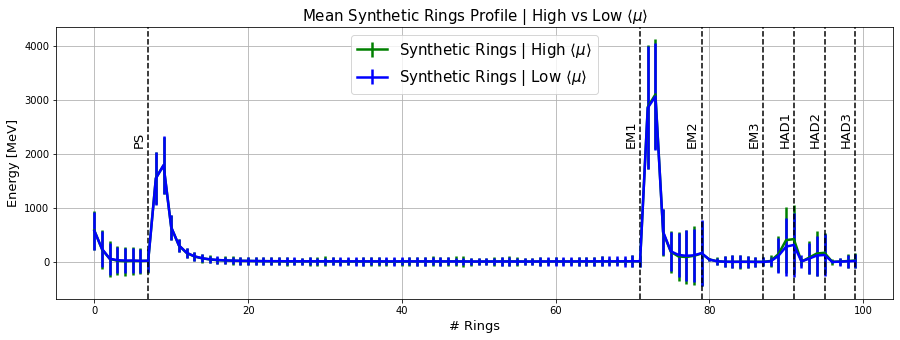

In [5]:
plot_mean_profile(low_mu_data, df2=high_mu_data)

3100.0182544030386


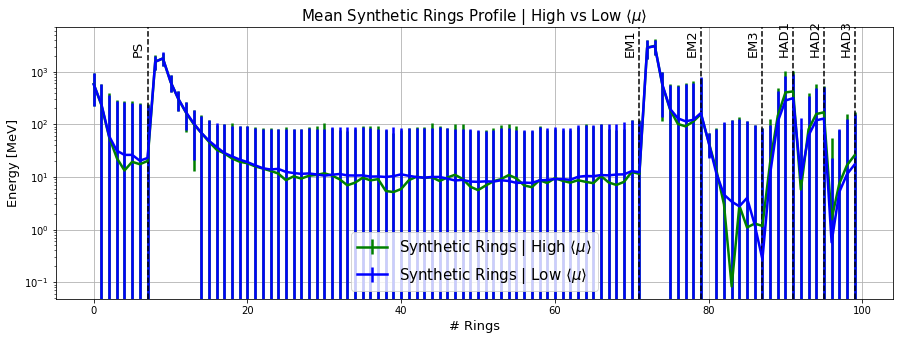

In [6]:
plot_mean_profile(low_mu_data, df2=high_mu_data, dolog=True)

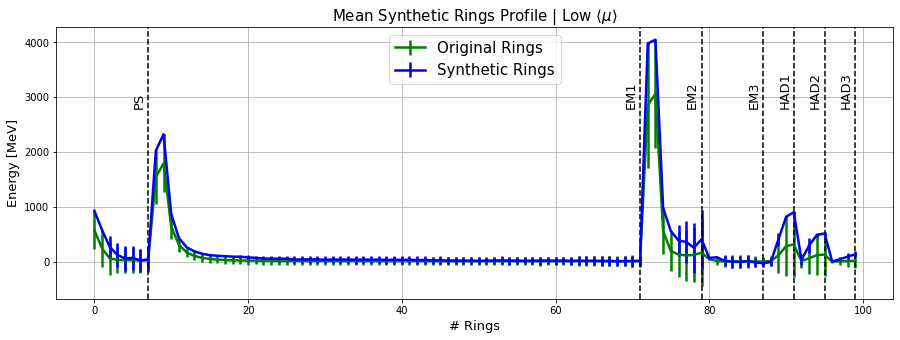

In [7]:
plot_mean_profile(low_gen_df)

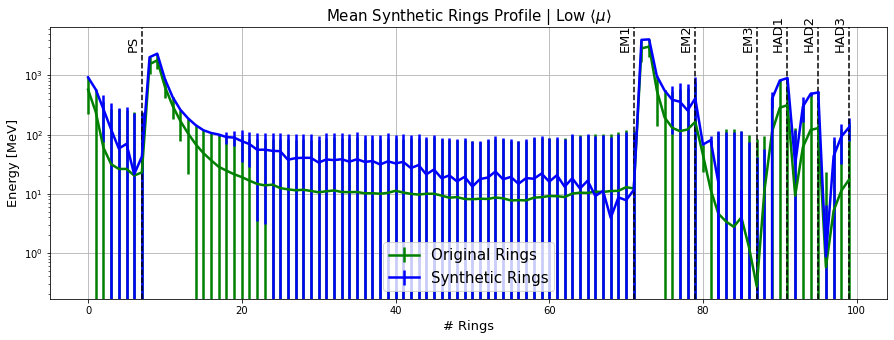

In [8]:
plot_mean_profile(low_gen_df, dolog=True)

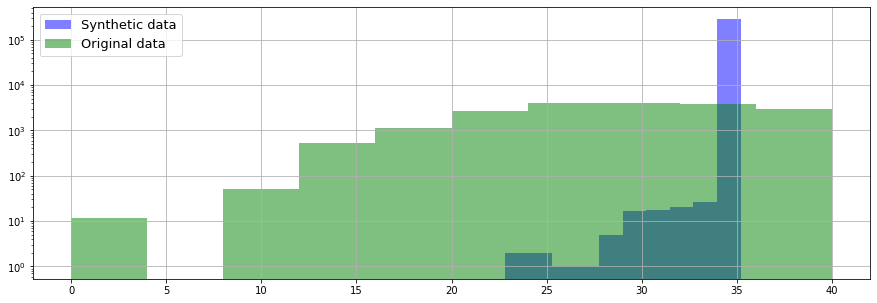

In [9]:
plt.figure(figsize=(15, 5))
plt.hist(low_gen_df.avgmu, color='blue', lw=1.5, alpha=.5, label='Synthetic data')
plt.hist(low_mu_data.avgmu, color='green', lw=1.5, alpha=.5, label='Original data')
plt.grid()
plt.legend(loc='best', fontsize=13)
plt.yscale('log')

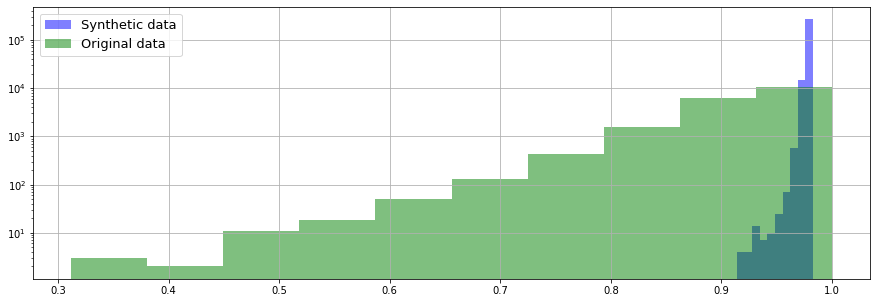

In [10]:
plt.figure(figsize=(15, 5))
plt.hist(low_gen_df.eratio, color='blue', lw=1.5, alpha=.5, label='Synthetic data')
plt.hist(low_mu_data.eratio, color='green', lw=1.5, alpha=.5, label='Original data')
plt.grid()
plt.legend(loc='best', fontsize=13)
plt.yscale('log')

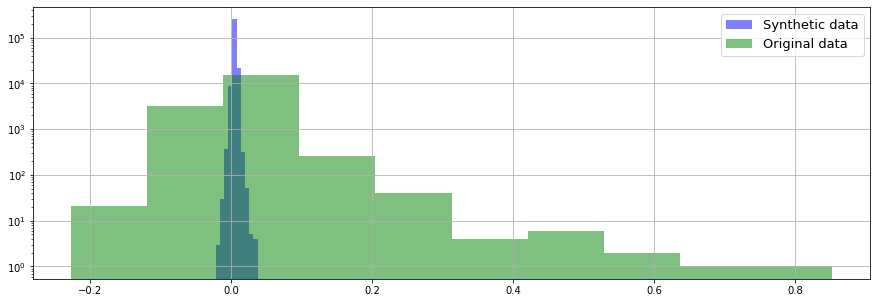

In [11]:
plt.figure(figsize=(15, 5))
plt.hist(low_gen_df.rhad, color='blue', lw=1.5, alpha=.5, label='Synthetic data')
plt.hist(low_mu_data.rhad, color='green', lw=1.5, alpha=.5, label='Original data')
plt.grid()
plt.legend(loc='best', fontsize=13)
plt.yscale('log')

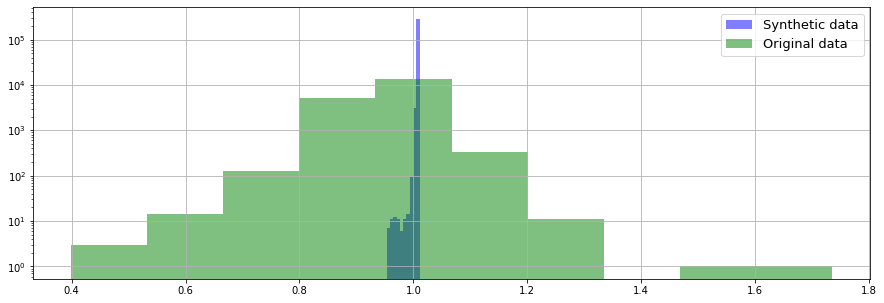

In [12]:
plt.figure(figsize=(15, 5))
plt.hist(low_gen_df.reta, color='blue', lw=1.5, alpha=.5, label='Synthetic data')
plt.hist(low_mu_data.reta, color='green', lw=1.5, alpha=.5, label='Original data')
plt.grid()
plt.legend(loc='best', fontsize=13)
plt.yscale('log')

# High mu

In [13]:
m_file = joblib.load(os.path.join(proc_path, 'high_mu_lr_gen_samples.jbl'))
m_list = []
print('Total of samples: %i' %len(m_file))
for i in m_file:
    m_list.append(np.reshape(i, (104)))

# back to real scale
m_data = h_scaler.inverse_transform(np.array(m_list))
print(m_data.shape)
cols_ = ['avgmu'] + ['L2Calo_ring_%i' %(iring) for iring in range(100)] + ['eratio', 'rhad', 'reta']

high_gen_df = pd.DataFrame(data=m_data, columns=cols_)
high_gen_df.head()

Total of samples: 13800
(13800, 104)


,avgmu,L2Calo_ring_0,L2Calo_ring_1,L2Calo_ring_2,L2Calo_ring_3,L2Calo_ring_4,L2Calo_ring_5,L2Calo_ring_6,L2Calo_ring_7,L2Calo_ring_8,...,L2Calo_ring_93,L2Calo_ring_94,L2Calo_ring_95,L2Calo_ring_96,L2Calo_ring_97,L2Calo_ring_98,L2Calo_ring_99,eratio,rhad,reta
0,43.379414,591.811462,173.729477,18.740088,15.089194,-17.920530,39.822468,-14.318860,13.529214,1466.181274,...,109.497894,104.359947,165.961823,-6.716992,14.377784,6.216253,43.439335,0.913160,0.011045,0.952554
1,43.303883,588.140137,167.082184,4.026105,48.489548,-15.403175,71.980034,-18.689016,43.635395,1498.230103,...,164.467438,63.167351,213.396240,-3.025028,19.962973,5.767665,78.336731,0.915221,0.014620,0.950378
2,43.452648,613.321411,199.709396,50.110744,52.591736,30.763237,92.633850,6.588714,43.760574,1605.260254,...,205.784149,106.204224,209.346237,7.395874,24.252449,28.541836,80.101257,0.923119,0.015544,0.954631
3,43.463459,620.807617,207.814148,62.106869,52.130318,36.243263,106.128586,4.270279,39.194710,1637.844727,...,220.856842,105.226028,187.109390,8.284623,31.292616,36.142502,79.130623,0.923983,0.016903,0.954476
4,43.476807,639.806396,212.858093,104.178238,57.298576,54.674618,110.766716,36.017925,40.559307,1690.485352,...,221.073929,165.760818,182.538422,13.340046,34.902283,53.111614,80.078209,0.927329,0.017083,0.957169


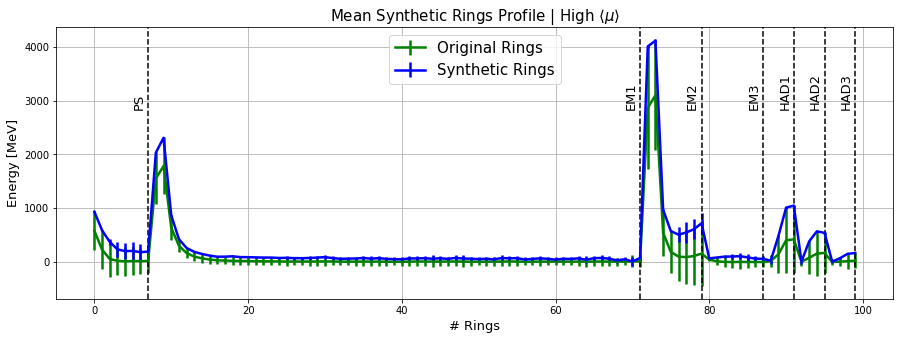

In [14]:
plot_mean_profile(high_gen_df)

4115.426


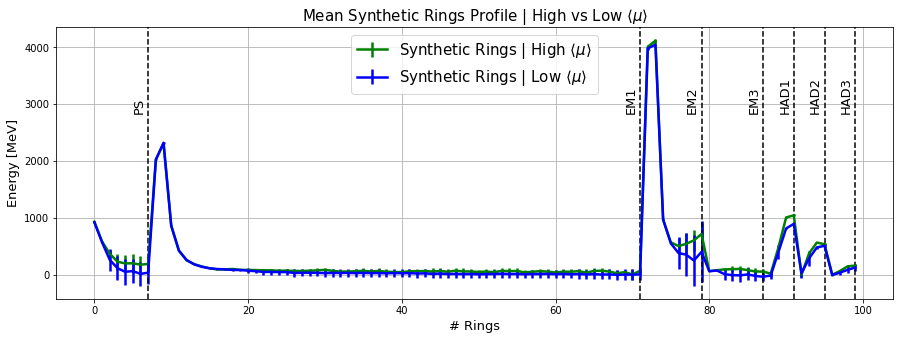

In [15]:
plot_mean_profile(low_gen_df, df2=high_gen_df)

4115.426


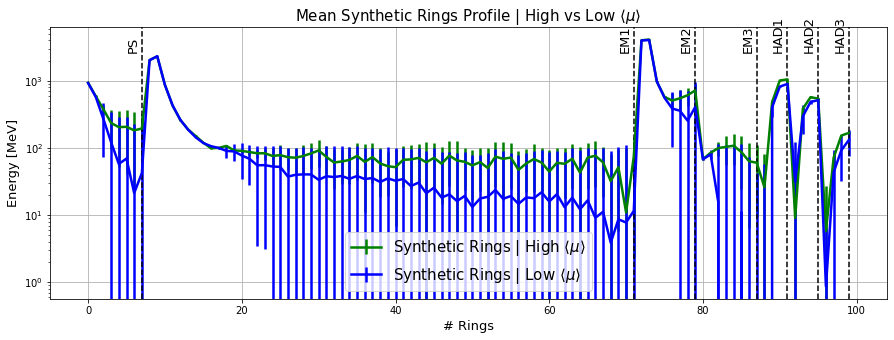

In [16]:
plot_mean_profile(low_gen_df, df2=high_gen_df, dolog=True)

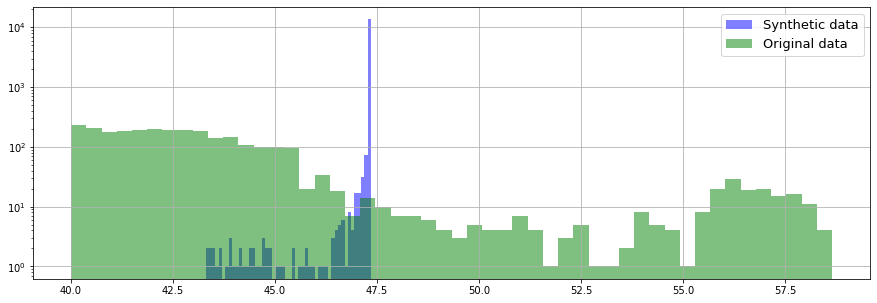

In [17]:
plt.figure(figsize=(15, 5))
m_bins = 50
plt.hist(high_gen_df.avgmu, bins=m_bins, color='blue', lw=1.5, alpha=.5, label='Synthetic data')
plt.hist(high_mu_data.avgmu, bins=m_bins, color='green', lw=1.5, alpha=.5, label='Original data')
plt.grid()
plt.legend(loc='best', fontsize=13)
plt.yscale('log')

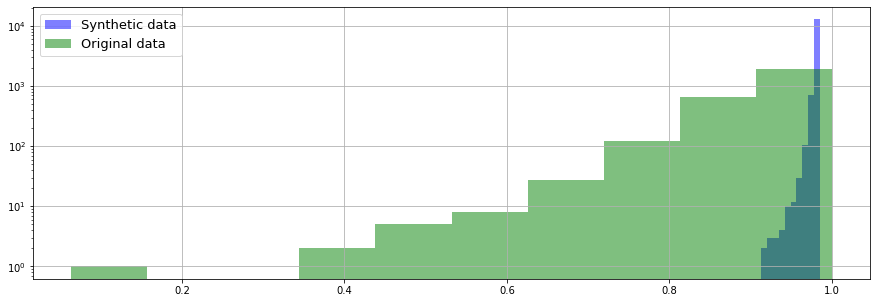

In [18]:
plt.figure(figsize=(15, 5))
plt.hist(high_gen_df.eratio, color='blue', lw=1.5, alpha=.5, label='Synthetic data')
plt.hist(high_mu_data.eratio, color='green', lw=1.5, alpha=.5, label='Original data')
plt.grid()
plt.legend(loc='best', fontsize=13)
plt.yscale('log')